pip install keras matplotlib

pip install tensorflow


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt

In [22]:
# Define the directory containing your original images
original_images_dir = r'E:\orginal'
# Create a list of image file names in the directory
image_files = os.listdir(original_images_dir)
print(image_files)

['cast_def_0_0.jpeg', 'cast_def_0_2.jpeg', 'cast_def_0_22.jpeg', 'cast_def_0_25.jpeg', 'cast_def_0_33.jpeg']


In [33]:
# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
# Specify the directory to save augmented images
augmented_images_dir = r'E:\augmentation'

In [40]:
# Loop through each image file and perform augmentation
for img_file in image_files:
    img_path = os.path.join(original_images_dir, img_file)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels) as required by the generator
    
    # Generate augmented images and save them to the specified directory
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_images_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i > 1:  # Generate 4 augmented images per original image
            break

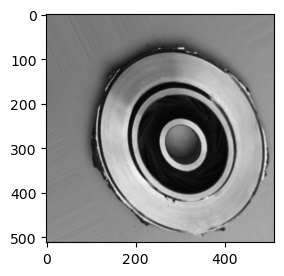

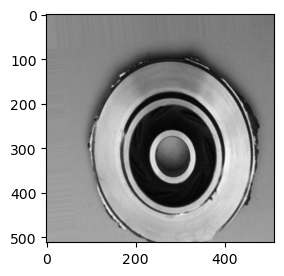

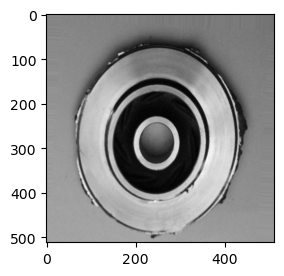

In [39]:
# Display the original and augmented images for one example
orginal_img_path = os.path.join(original_images_dir, image_files[0])
original_img = load_img(orginal_img_path)
original_img_array = img_to_array(original_img)
original_img_array = original_img_array.reshape((1,) + original_img_array.shape)

i = 0
for batch in datagen.flow(original_img_array, batch_size=1):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 3, i + 1)
    plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break

plt.show()